In [10]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn openpyxl ftfy deep-translator imblearn 



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [12]:
# Load dataset 
df = pd.read_excel('Triage_Dataset.xlsx')
print('Loaded dataset with shape:', df.shape)

display(df.head())
print('Dtypes:', df.dtypes)

print("\nColumns:") 
print(df.columns.tolist())

print('Numeric summary:')
display(df.describe(include=[np.number]).transpose())

print('Missing values per column:')
print(df.isna().sum())

print('Duplicate rows:', df.duplicated().sum())

Loaded dataset with shape: (1267, 24)


,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71.0,3,3,2,right ocular pain,1,1,2.0,...,36.6,100.0,2,Corneal abrasion,1,4,2,86.0,5.000000,1
1,1,1,56.0,12,3,2,right forearm burn,1,1,2.0,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64.0,3.950000,1
2,2,1,67.5,8,2,2,"arm pain, Lt",1,1,2.0,...,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",2,5,4,862.0,1.000000,1
3,1,2,71.0,8,1,1,ascites tapping,1,1,3.0,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108.0,9.833333,1
4,1,2,58.0,4,3,1,"distension, abd",1,1,3.0,...,36.5,NaN,4,Ascites,1,5,8,109.0,6.600000,1


Dtypes: Group                         int64
Sex                           int64
Age                         float64
Patients number per hour      int64
Arrival mode                  int64
Injury                        int64
Chief_complain               object
Mental                        int64
Pain                          int64
NRS_pain                    float64
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturation                  float64
KTAS_RN                       int64
Diagnosis in ED              object
Disposition                   int64
KTAS_expert                   int64
Error_group                   int64
Length of stay_min          float64
KTAS duration_min           float64
mistriage                     int64
dtype: object

Columns:
['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode', 'Injury', 'Chief_complain', 'Mental'

,count,mean,std,min,25%,50%,75%,max
Group,1267.0,1.456985,0.498343,1.000000,1.0,1.000000,2.0,2.00000
Sex,1267.0,1.521705,0.499726,1.000000,1.0,2.000000,2.0,2.00000
Age,1267.0,54.394396,19.722260,15.500000,37.0,57.000000,71.0,95.80000
Patients number per hour,1267.0,7.519337,3.160563,1.000000,5.0,7.000000,10.0,17.00000
Arrival mode,1267.0,2.820837,0.807904,1.000000,2.0,3.000000,3.0,7.00000
Injury,1267.0,1.192581,0.394482,1.000000,1.0,1.000000,1.0,2.00000
Mental,1267.0,1.105762,0.447768,1.000000,1.0,1.000000,1.0,4.00000
Pain,1267.0,0.563536,0.496143,0.000000,0.0,1.000000,1.0,1.00000
NRS_pain,711.0,4.104079,1.419332,1.000000,3.0,4.000000,5.0,10.00000
SBP,1242.0,133.648953,27.275639,50.000000,114.0,130.000000,150.0,275.00000


Missing values per column:
Group                         0
Sex                           0
Age                           0
Patients number per hour      0
Arrival mode                  0
Injury                        0
Chief_complain                0
Mental                        0
Pain                          0
NRS_pain                    556
SBP                          25
DBP                          29
HR                           20
RR                           22
BT                           18
Saturation                  697
KTAS_RN                       0
Diagnosis in ED               2
Disposition                   0
KTAS_expert                   0
Error_group                   0
Length of stay_min            0
KTAS duration_min             0
mistriage                     0
dtype: int64
Duplicate rows: 0


In [13]:
df_clean = pd.read_excel('Triage_Dataset.xlsx')

num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

ktas_col = "KTAS_expert"
for col in num_cols:
    if col == ktas_col:
        continue
    
    # Group-based filling
    df_clean[col] = df_clean.groupby(ktas_col)[col].transform(
        lambda group: group.fillna(group.median())
    )
    
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    nonnull = df_clean[col].dropna()
    try:
        if not nonnull.empty and np.all(np.equal(np.mod(nonnull.astype(float), 1), 0)):
            df_clean[col] = df_clean[col].astype('Int64')
    except Exception:
        pass


obj_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

for col in obj_cols:
    if df_clean[col].isna().any():
        mode_vals = df_clean[col].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[col] = df_clean[col].fillna(mode_vals[0])


int_cols = ["Age", "NRS_pain", "SBP", "DBP", "RR", "Saturation"]

for col in int_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
        df_clean[col] = df_clean[col].round().astype("Int64")


df_clean["BT"] = (
    df_clean["BT"].astype(str)
    .str.replace(r'[^0-9.\-]', '', regex=True)
    .replace("", np.nan)
    .astype(float)
)

print("Dtypes after cleaning:")
print(df_clean.dtypes)

df_clean.to_excel('cleaned.xlsx', index=False)
print("Saved cleaned file to cleaned.xlsx")
print("Final shape:", df_clean.shape)


Dtypes after cleaning:
Group                         Int64
Sex                           Int64
Age                           Int64
Patients number per hour      Int64
Arrival mode                  Int64
Injury                        Int64
Chief_complain               object
Mental                        Int64
Pain                          Int64
NRS_pain                      Int64
SBP                           Int64
DBP                           Int64
HR                            Int64
RR                            Int64
BT                          float64
Saturation                    Int64
KTAS_RN                       Int64
Diagnosis in ED              object
Disposition                   Int64
KTAS_expert                   int64
Error_group                   Int64
Length of stay_min          float64
KTAS duration_min           float64
mistriage                     Int64
dtype: object
Saved cleaned file to cleaned.xlsx
Final shape: (1267, 24)


In [14]:
df_clean = pd.read_excel('cleaned.xlsx')

duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Removing them...")
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
else:
    print("No duplicate rows found.")

# Normalize column names
df_clean.columns = (
    df_clean.columns
    .str.strip()              
    .str.lower()               
    .str.replace(' ', '_')      
    .str.replace(r'[^\w_]', '', regex=True) 
)

numeric_cols = ["Age", "NRS_pain", "SBP", "DBP", "HR", "RR", "Saturation"]
for col in numeric_cols:
    if col in df_clean.columns:
        print(f"\nColumn: {col}")
        print(df_clean[col].describe())
        if col == "Age":
            df_clean.loc[(df_clean[col] < 0) | (df_clean[col] > 120), col] = np.nan
        elif col in ["SBP"]:
            df_clean.loc[(df_clean[col] < 50) | (df_clean[col] > 250), col] = np.nan
        elif col in ["DBP"]:
            df_clean.loc[(df_clean[col] < 30) | (df_clean[col] > 150), col] = np.nan
        elif col in ["HR"]:
            df_clean.loc[(df_clean[col] < 30) | (df_clean[col] > 200), col] = np.nan
        elif col in ["RR"]:
            df_clean.loc[(df_clean[col] < 5) | (df_clean[col] > 60), col] = np.nan
        elif col in ["Saturation"]:
            df_clean.loc[(df_clean[col] < 50) | (df_clean[col] > 100), col] = np.nan

if "BT" in df_clean.columns:
    df_clean.loc[(df_clean["BT"] < 30) | (df_clean["BT"] > 45), "BT"] = np.nan

text_cols = ["Chief_complain", "Diagnosis in ED"]
for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.lower().str.strip()

for col in numeric_cols:
    if col not in df_clean.columns:
        continue
    if df_clean[col].isna().any():
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)
    df_clean[col] = df_clean[col].round()
    df_clean[col] = df_clean[col].astype("Int64")

if "BT" in df_clean.columns and df_clean["BT"].isna().any():
    median_bt = df_clean["BT"].median()
    df_clean["BT"] = df_clean["BT"].fillna(median_bt)

for col in text_cols:
    if col in df_clean.columns:
        mode_val = df_clean[col].mode(dropna=True)
        if not mode_val.empty:
            df_clean[col] = df_clean[col].fillna(mode_val[0])


df_clean.to_excel('cleaned_final.xlsx', index=False)
print("Saved fully cleaned dataset to 'cleaned_final.xlsx'")

print("\nRemaining missing values per column:")
print(df_clean.isna().sum())
print("\nFinal dtypes:")
print(df_clean.dtypes)

print('Loaded dataset with shape:', df_clean.shape)

No duplicate rows found.
Saved fully cleaned dataset to 'cleaned_final.xlsx'

Remaining missing values per column:
group                       0
sex                         0
age                         0
patients_number_per_hour    0
arrival_mode                0
injury                      0
chief_complain              0
mental                      0
pain                        0
nrs_pain                    0
sbp                         0
dbp                         0
hr                          0
rr                          0
bt                          0
saturation                  0
ktas_rn                     0
diagnosis_in_ed             0
disposition                 0
ktas_expert                 0
error_group                 0
length_of_stay_min          0
ktas_duration_min           0
mistriage                   0
dtype: int64

Final dtypes:
group                         int64
sex                           int64
age                           int64
patients_number_per_hour     

Dataset shape: (1267, 24)

Columns: ['group', 'sex', 'age', 'patients_number_per_hour', 'arrival_mode', 'injury', 'chief_complain', 'mental', 'pain', 'nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation', 'ktas_rn', 'diagnosis_in_ed', 'disposition', 'ktas_expert', 'error_group', 'length_of_stay_min', 'ktas_duration_min', 'mistriage']

Data types:
group                         int64
sex                           int64
age                           int64
patients_number_per_hour      int64
arrival_mode                  int64
injury                        int64
chief_complain               object
mental                        int64
pain                          int64
nrs_pain                      int64
sbp                           int64
dbp                           int64
hr                            int64
rr                            int64
bt                          float64
saturation                    int64
ktas_rn                       int64
diagnosis_in_ed              object


,count,mean,std,min,25%,50%,75%,max
group,1267.0,1.456985,0.498343,1.000000,1.0,1.000000,2.0,2.00000
sex,1267.0,1.521705,0.499726,1.000000,1.0,2.000000,2.0,2.00000
age,1267.0,54.404104,19.724947,16.000000,37.0,57.000000,71.0,96.00000
patients_number_per_hour,1267.0,7.519337,3.160563,1.000000,5.0,7.000000,10.0,17.00000
arrival_mode,1267.0,2.820837,0.807904,1.000000,2.0,3.000000,3.0,7.00000
injury,1267.0,1.192581,0.394482,1.000000,1.0,1.000000,1.0,2.00000
mental,1267.0,1.105762,0.447768,1.000000,1.0,1.000000,1.0,4.00000
pain,1267.0,0.563536,0.496143,0.000000,0.0,1.000000,1.0,1.00000
nrs_pain,1267.0,4.028414,1.254684,1.000000,3.0,4.000000,5.0,10.00000
sbp,1267.0,133.134964,27.389588,50.000000,112.5,130.000000,150.0,275.00000


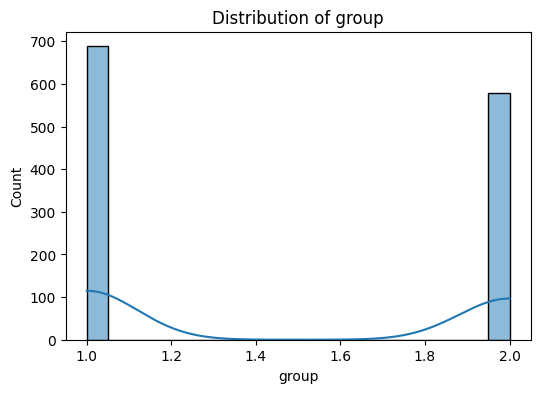

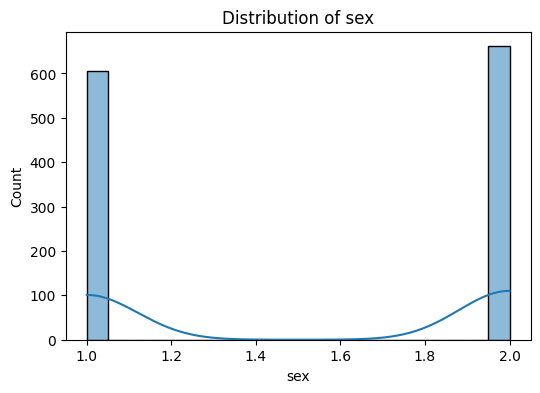

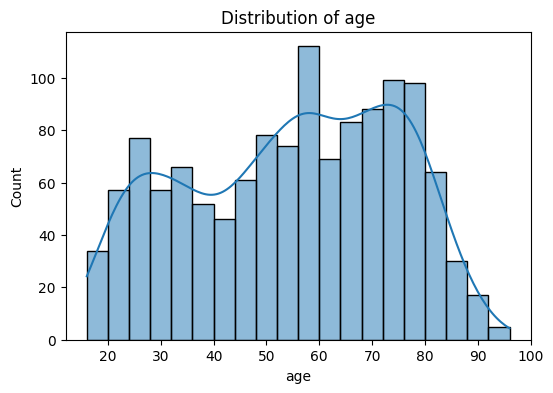

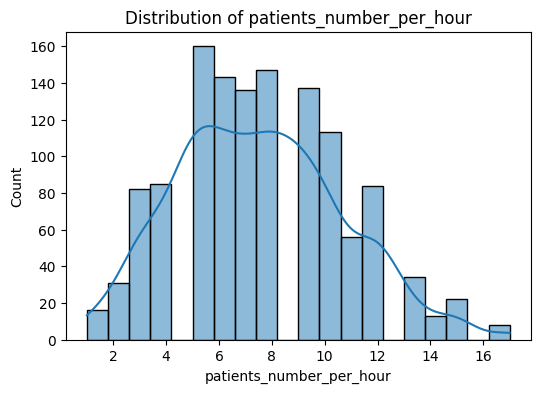

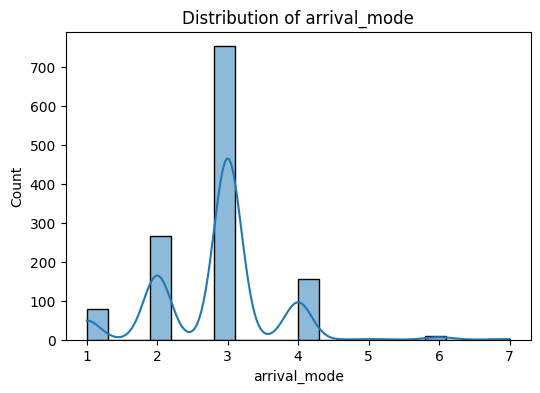

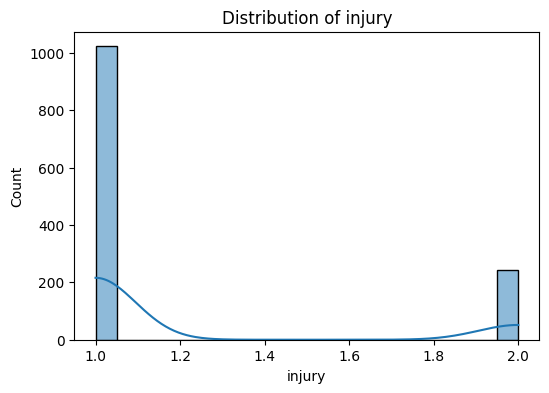

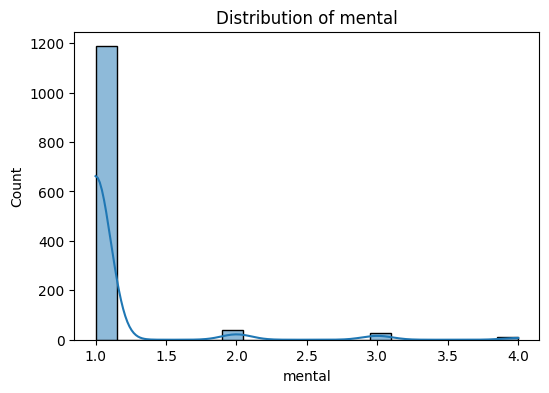

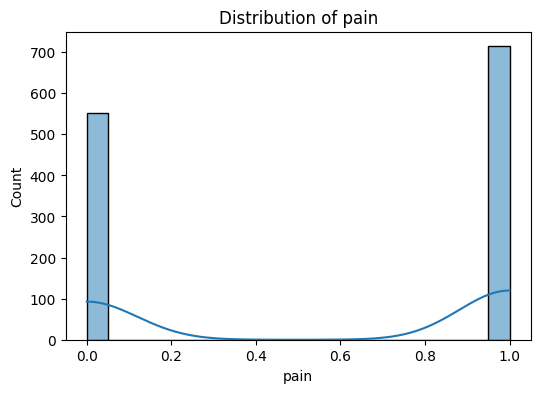

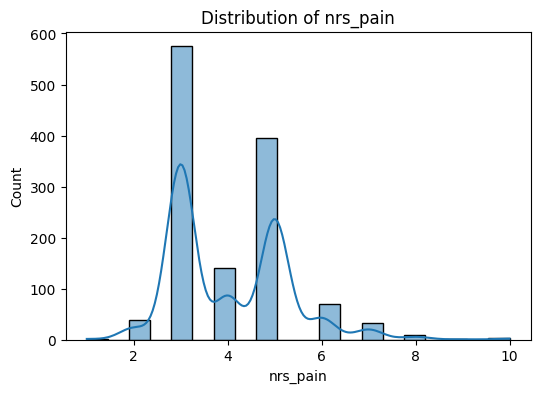

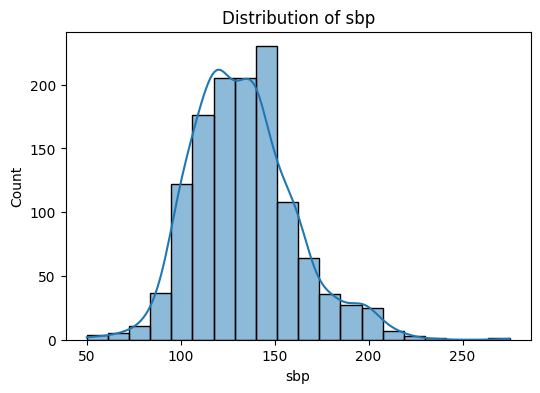

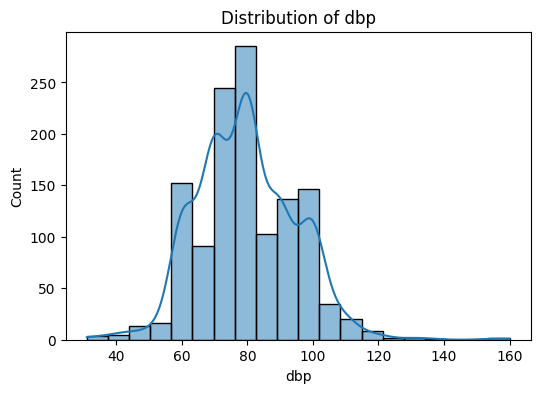

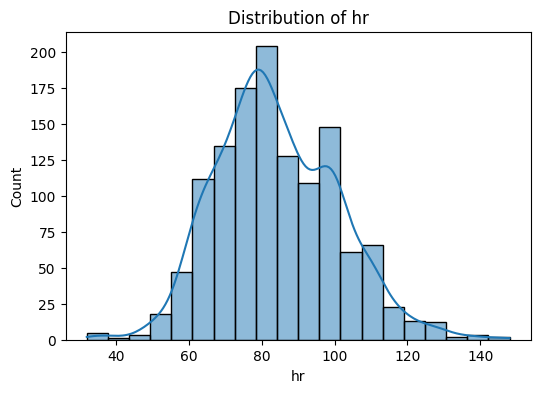

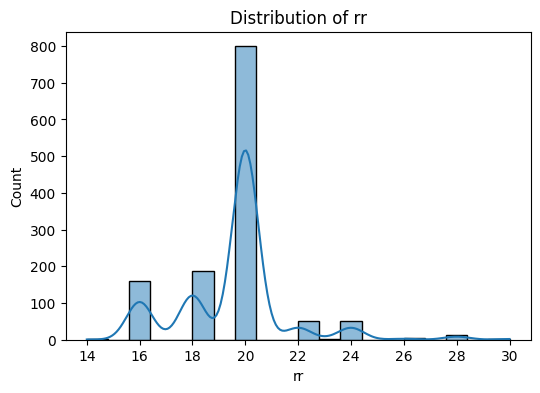

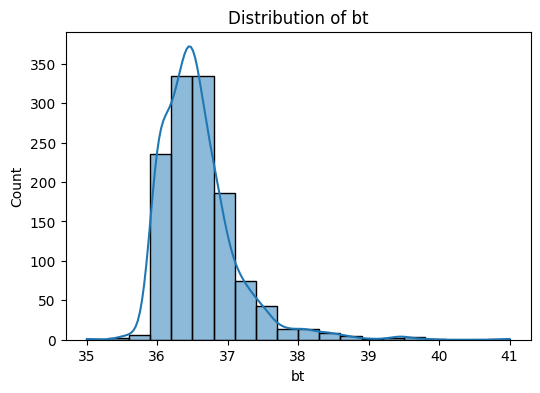

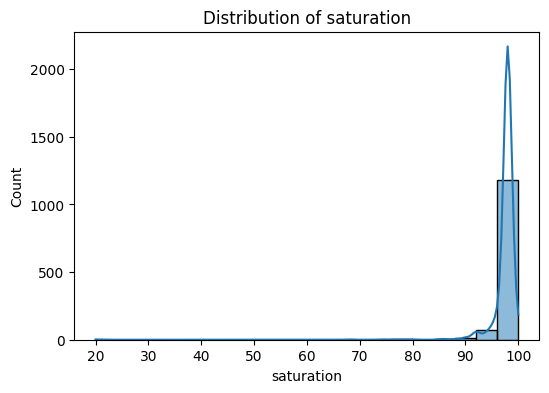

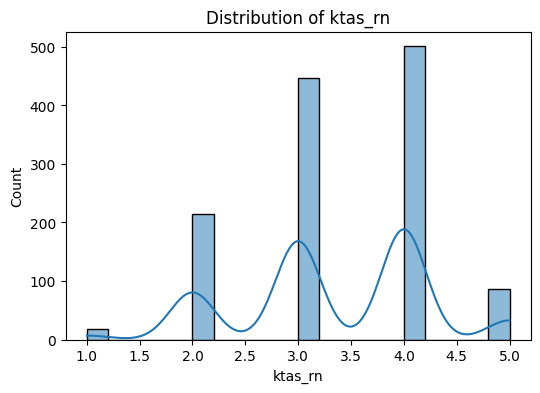

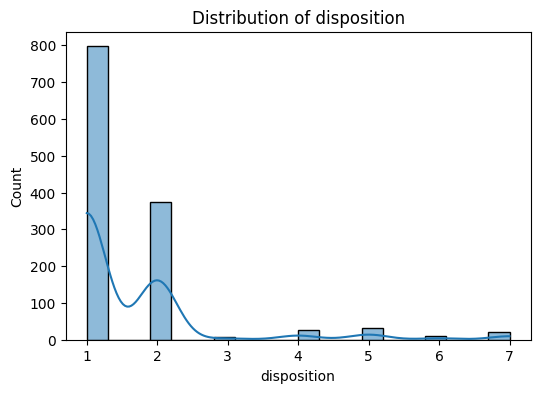

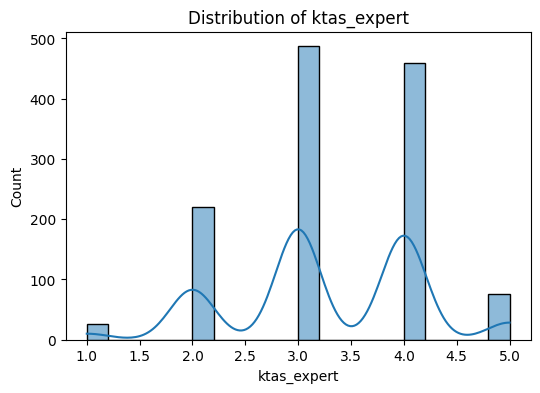

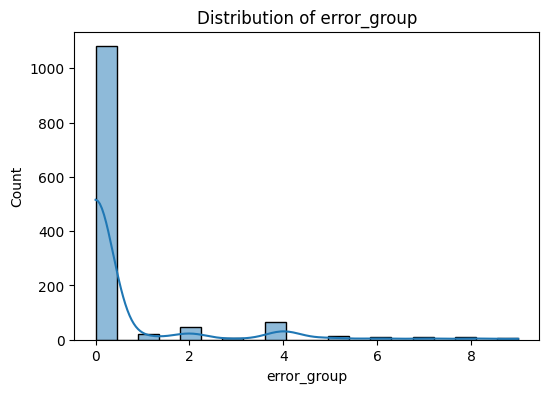

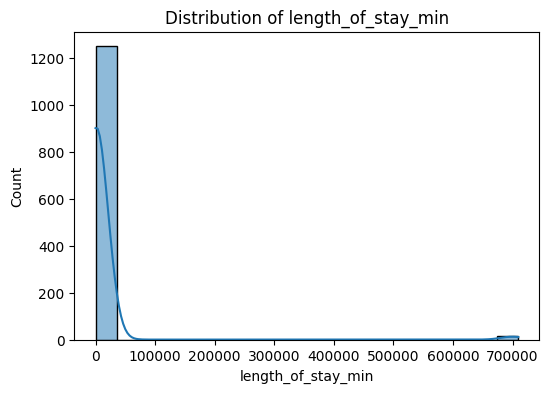

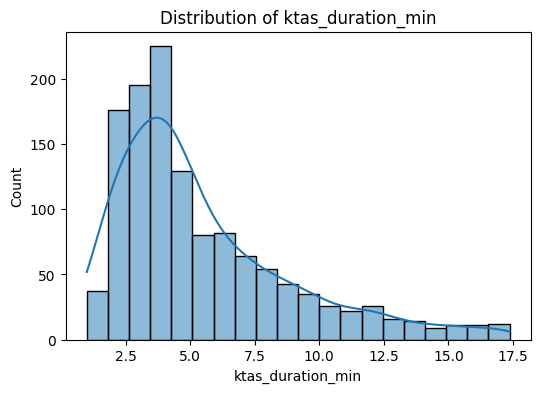

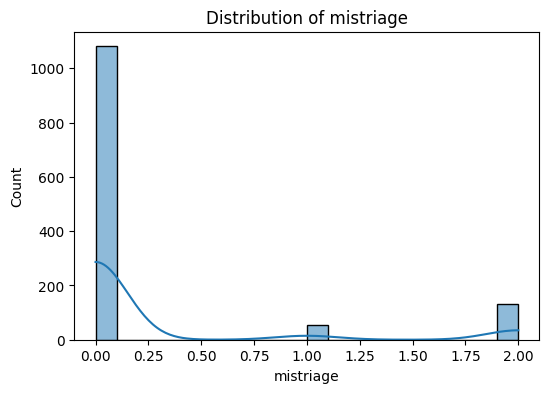


Counts of ktas_expert levels:
ktas_expert
1     26
2    220
3    487
4    459
5     75
Name: count, dtype: int64


C:\Users\areej\AppData\Local\Temp\ipykernel_15236\100555548.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ktas_col, data=df, palette='Set2')


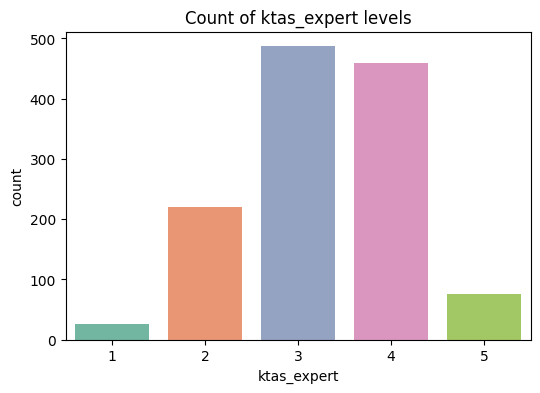


Value counts for chief_complain:


chief_complain
abd pain             72
dyspnea              60
dizziness            59
fever                45
ant. chest pain      44
                     ..
PTBD leaukage         1
BST high              1
numbness              1
itching sensation     1
Aphasia, Motor        1
Name: count, Length: 425, dtype: int64


Value counts for diagnosis_in_ed:


diagnosis_in_ed
Acute gastroenteritis                              51
Headache                                           26
Unspecified abdominal pain                         23
Ischaemic chest pain                               21
Dizziness                                          20
                                                   ..
Infectious diarrhoea NOS                            1
Laceration of hand                                  1
Superficial injury of face NOS, contusion           1
Polyneuropathy in neoplastic disease (C00-D48+)     1
Open wound of lip                                   1
Name: count, Length: 583, dtype: int64

Loaded dataset with shape: (1267, 24)


In [15]:
#EDA
df = pd.read_excel('cleaned_final.xlsx')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum())

# --- Summary statistics for numeric columns ---
numeric_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns.tolist()
print("\nNumeric summary statistics:")
display(df[numeric_cols].describe().transpose())

# --- Distribution plots for numeric columns ---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# --- Count of KTAS levels ---
ktas_col = 'ktas_expert'
if ktas_col in df.columns:
    print(f"\nCounts of {ktas_col} levels:")
    print(df[ktas_col].value_counts().sort_index())
    
    # Bar plot
    plt.figure(figsize=(6,4))
    sns.countplot(x=ktas_col, data=df, palette='Set2')
    plt.title(f'Count of {ktas_col} levels')
    plt.show()

# --- Categorical columns summary ---
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())

print('Loaded dataset with shape:', df.shape)



In [16]:
# Feature Engineering (may be redundant)
df = pd.read_excel('cleaned_final.xlsx')

# 1. MAP (Mean Arterial Pressure)
df['map'] = (df['sbp'] + 2 * df['dbp']) / 3

# 2. Blood pressure flags
df['high_bp'] = (df['sbp'] > 140).astype(int)
df['low_bp'] = (df['sbp'] < 90).astype(int)

# 3. Heart rate flags
df['tachy'] = (df['hr'] > 100).astype(int)
df['brady'] = (df['hr'] < 60).astype(int)

# 4. Respiratory rate flags
df['tachypnea'] = (df['rr'] > 20).astype(int)
df['bradypnea'] = (df['rr'] < 12).astype(int)

# 5. Temperature flags
df['fever'] = (df['bt'] >= 38).astype(int)
df['hypothermia'] = (df['bt'] < 36).astype(int)

# 6. Oxygen saturation flag
df['low_spo2'] = (df['saturation'] < 92).astype(int)

# 7. Age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 14, 64, 120],
    labels=['child', 'adult', 'elderly']
)

# convert age_group to numbers
df['age_group'] = df['age_group'].astype('category').cat.codes

# 8. Risk score (sum of abnormal vitals)
df['risk_score'] = (
    df['high_bp'] + df['low_bp'] +
    df['tachy'] + df['brady'] +
    df['tachypnea'] + df['bradypnea'] +
    df['fever'] + df['hypothermia'] +
    df['low_spo2']
)

# 9. Interaction features
df['sbp_hr_ratio'] = df['sbp'] / (df['hr'] + 1e-5)
df['rr_hr_ratio'] = df['rr'] / (df['hr'] + 1e-5)

# 10. Pain interactions
df['pain_nrs'] = df['pain'] * df['nrs_pain']

df['temp_hr_ratio'] = df['bt'] / (df['hr'] + 1e-5)

df['rr_sbp_ratio'] = df['rr'] / (df['sbp'] + 1e-5)

df['hr_age_ratio'] = df['hr'] / (df['age'] + 1e-5)

df['sbp_age_ratio'] = df['sbp'] / (df['age'] + 1e-5)

# Pulse Pressure Ratio
df['pulse_pressure_ratio'] = (df['sbp'] - df['dbp']) / (df['sbp'] + 1e-5)

df['shock_flag'] = ((df['sbp'] < 90) & (df['hr'] > 100)).astype(int)

df['wide_pp'] = ((df['sbp'] - df['dbp']) > 60).astype(int)

# O2 + RR combined indicator
df['resp_distress'] = ((df['saturation'] < 92) & (df['rr'] > 22)).astype(int)

# Breathing inefficiency
df['spo2_rr_ratio'] = df['saturation'] / (df['rr'] + 1e-5)

# Fever + tachycardia = infection indicator
df['fever_tachy_combo'] = ((df['bt'] >= 38) & (df['hr'] > 100)).astype(int)

# Fever + RR high
df['fever_fastbreath'] = ((df['bt'] >= 38) & (df['rr'] > 20)).astype(int)

# Elderly risk
df['elderly'] = (df['age'] >= 65).astype(int)

# Pediatric indicator
df['child'] = (df['age'] <= 14).astype(int)

df['age_sq'] = df['age'] ** 2

# Severe pain threshold
df['severe_pain_flag'] = (df['nrs_pain'] >= 7).astype(int)

# Pain relative to HR
df['pain_hr_ratio'] = df['nrs_pain'] / (df['hr'] + 1e-5)

df['cc_length'] = df['chief_complain'].astype(str).apply(len)
df['cc_words'] = df['chief_complain'].astype(str).apply(lambda x: len(x.split()))

df['cc_chest'] = df['chief_complain'].str.contains('chest', case=False, na=False).astype(int)
df['cc_fever'] = df['chief_complain'].str.contains('fever', case=False, na=False).astype(int)
df['cc_abdominal'] = df['chief_complain'].str.contains('abdo|abdomen', case=False, na=False).astype(int)
df['cc_pain'] = df['chief_complain'].str.contains('pain', case=False, na=False).astype(int)
df['cc_trauma'] = df['chief_complain'].str.contains('trauma|injury', case=False, na=False).astype(int)

df['shock_index'] = df['hr'] / df['sbp']

df['pulse_pressure'] = df['sbp'] - df['dbp']

df['c_shock_index'] = (df['hr'] / df['sbp']) * df['bt']

df['resp_ratio'] = df['rr'] / df['saturation']

arrival_weight = {
    1: 1, 2: 3, 3: 1, 4: 3, 5: 2, 6: 2, 7: 1
}
df['arrival_weight'] = df['arrival_mode'].map(arrival_weight)

df['abnormal_vitals'] = (
    (df['sbp'] < 90) |
    (df['sbp'] > 180) |
    (df['hr'] < 50) |
    (df['hr'] > 120) |
    (df['rr'] < 12) |
    (df['rr'] > 24) |
    (df['bt'] > 38) |
    (df['bt'] < 36)
).astype(int)

df['pain_level'] = pd.cut(
    df['nrs_pain'],
    bins=[0, 3, 6, 10],
    labels=['low', 'medium', 'high']
)

df['mental_critical'] = (df['mental'] > 2).astype(int)

df['shock_age_interaction'] = df['shock_index'] * df['age']

df['pp_hr_interaction'] = df['pulse_pressure'] * df['hr']

df['critical_flag'] = (
    (df['shock_flag'] == 1) |
    (df['resp_distress'] == 1) |
    (df['low_spo2'] == 1) |
    (df['fever_tachy_combo'] == 1)
).astype(int)

df['hr_age_norm'] = df['hr'] / (df['age'] + 1e-5)
df['sbp_age_norm'] = df['sbp'] / (df['age'] + 1e-5)
df['rr_age_norm'] = df['rr'] / (df['age'] + 1e-5)


print('Loaded dataset with shape:', df.shape)

df.to_excel('cleaned_final_features.xlsx', index=False)
print("Saved updated dataset with new features to 'cleaned_final_features.xlsx'")

Loaded dataset with shape: (1267, 76)
Saved updated dataset with new features to 'cleaned_final_features.xlsx'


In [17]:
df = pd.read_excel('cleaned_final_features.xlsx')

# Target column
target = 'ktas_expert'

# Columns to drop from features (data leakage or irrelevant)
drop_cols = [
    target,
    'ktas_rn',       
    'error_group',   
    'mistriage', 
    'length_of_stay_min',
    'ktas_duration_min',
    'patients_number_per_hour',
    'diagnosis_in_ed',
    'disposition']

X = df.drop(columns=drop_cols)
y = df[target]

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

X_train_float = X_train.astype(float)

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train_float, y_train)
print("After SMOTE, training set shape:", X_train_res.shape)
print("Class distribution after SMOTE:", Counter(y_train_res))

# Scaling for LogisticRegression/SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


Training set shape: (1013, 491)
Test set shape: (254, 491)
After SMOTE, training set shape: (1945, 491)
Class distribution after SMOTE: Counter({4: 389, 3: 389, 2: 389, 1: 389, 5: 389})


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=12, min_samples_split=4, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, eval_metric='mlogloss', use_label_encoder=False, random_state=42 , scale_pos_weight=1),
    "Logistic Regression": LogisticRegression(max_iter=5000 , class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42 , class_weight='balanced'),
    "Extra Trees": ExtraTreesClassifier(n_estimators=500, random_state=42, class_weight='balanced'),
    "SVM": SVC(class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

results = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_train_shifted = y_train_res - 1
y_test_shifted = y_test - 1

for name, model in models.items():
    print(f"\n=== {name} ===")
    if name in ["Logistic Regression", "SVM", "KNN"]:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
        y_train_model = y_train_res 
        y_test_model = y_test
    elif name == "XGBoost":
        X_train_model = X_train_res
        X_test_model = X_test
        y_train_model = y_train_shifted 
        y_test_model = y_test_shifted
    else:  
        X_train_model = X_train_res
        X_test_model = X_test
        y_train_model = y_train_res
        y_test_model = y_test

    # Fit model
    model.fit(X_train_model, y_train_model)
    
    # Predict
    y_pred = model.predict(X_test_model)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train_model, cv=skf, scoring='accuracy')
    
    # Metrics
    acc = accuracy_score(y_test_model, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(classification_report(y_test_model, y_pred, zero_division=0))
    
    # Confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.sort(y.unique()))
    # # disp.plot(cmap=plt.cm.Blues)
    # plt.title(f"Confusion Matrix - {name}")
    # plt.show()
    
    results.append((name, acc, cv_scores.mean()))

# Display summary table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'CV Accuracy']).sort_values(by='Accuracy', ascending=False)
display(results_df)



=== Random Forest ===
Accuracy: 0.7638
Cross-Validation Accuracy: 0.8643 ± 0.0094
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.72      0.66      0.69        44
           3       0.90      0.89      0.89        98
           4       0.75      0.74      0.74        92
           5       0.25      0.33      0.29        15

    accuracy                           0.76       254
   macro avg       0.69      0.72      0.70       254
weighted avg       0.77      0.76      0.77       254


=== Gradient Boosting ===
Accuracy: 0.8110
Cross-Validation Accuracy: 0.8802 ± 0.0146
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.74      0.73      0.74        44
           3       0.94      0.86      0.90        98
           4       0.75      0.89      0.82        92
           5       0.44      0.27      0.33        15

    accuracy   

c:\Users\areej\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:39:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\areej\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:39:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\areej\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:39:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\areej\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboos

Accuracy: 0.7874
Cross-Validation Accuracy: 0.8771 ± 0.0148
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.76      0.73      0.74        44
           2       0.93      0.83      0.88        98
           3       0.72      0.86      0.79        92
           4       0.36      0.27      0.31        15

    accuracy                           0.79       254
   macro avg       0.72      0.70      0.70       254
weighted avg       0.79      0.79      0.79       254


=== Logistic Regression ===
Accuracy: 0.7047
Cross-Validation Accuracy: 0.8823 ± 0.0099
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         5
           2       0.58      0.59      0.58        44
           3       0.87      0.80      0.83        98
           4       0.71      0.71      0.71        92
           5       0.28      0.33      0.30        15

    accuracy                        

,Model,Accuracy,CV Accuracy
1,Gradient Boosting,0.811024,0.880206
5,Extra Trees,0.791339,0.914139
2,XGBoost,0.787402,0.877121
0,Random Forest,0.763780,0.864267
4,Decision Tree,0.712598,0.812853
3,Logistic Regression,0.704724,0.882262
6,SVM,0.661417,0.867866
7,KNN,0.555118,0.759897
